# PSB injection bump in Xsuite - track!

In [11]:
%matplotlib notebook

In [12]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import xtrack as xt
import xpart as xp
import xdeps as xd

from cpymad.madx import Madx

###  Load line from previous notebook

In [29]:
# Reload
line = xt.Line.from_json('psb_04_with_chicane_corrected_thin.json')
line.build_tracker()

Done loading line from dict.           
Found suitable prebuilt kernel `default_only_xtrack`.


### Switch on RF

In [30]:
tw = line.twiss()

line.vars['v_rf'] = 8e3 # V
line.vars['f_rf'] = 1 / tw.T_rev0 # h = 1
line.element_refs['br1.acwf7l1.1'].voltage = line.vars['v_rf']
line.element_refs['br1.acwf7l1.1'].frequency = line.vars['f_rf']

Found suitable prebuilt kernel `only_xtrack_frozen_energy`.


We can switch to 6d method as default for the twiss

In [37]:
line.twiss_default['method'] = '6d'

In [38]:
# Check synchrotron tune (confirms that longitudinal motion is stable)
tw6d = line.twiss()
tw6d.qs

0.0017021494318562591

### Enable chicane and chicane correction

In [ ]:
line.vars['on_chicane_k0'] = 1
line.vars['on_chicane_k2'] = 1
line.vars['on_chicane_beta_corr'] = 1
line.vars['on_chicane_tune_corr'] = 1

### Install monitor at foil

In [39]:
monitor = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=6000, num_particles=1)

line.discard_tracker()
line.insert_element(index='bi1.tstr1l1', element=monitor, name='monitor_at_foil')
line.build_tracker()

Found suitable prebuilt kernel `default_only_xtrack`.


# Generate a matched bunch distribution

Found suitable prebuilt kernel `default_only_xtrack`.
Tracking...
Done in 7.43 s


<IPython.core.display.Javascript object>


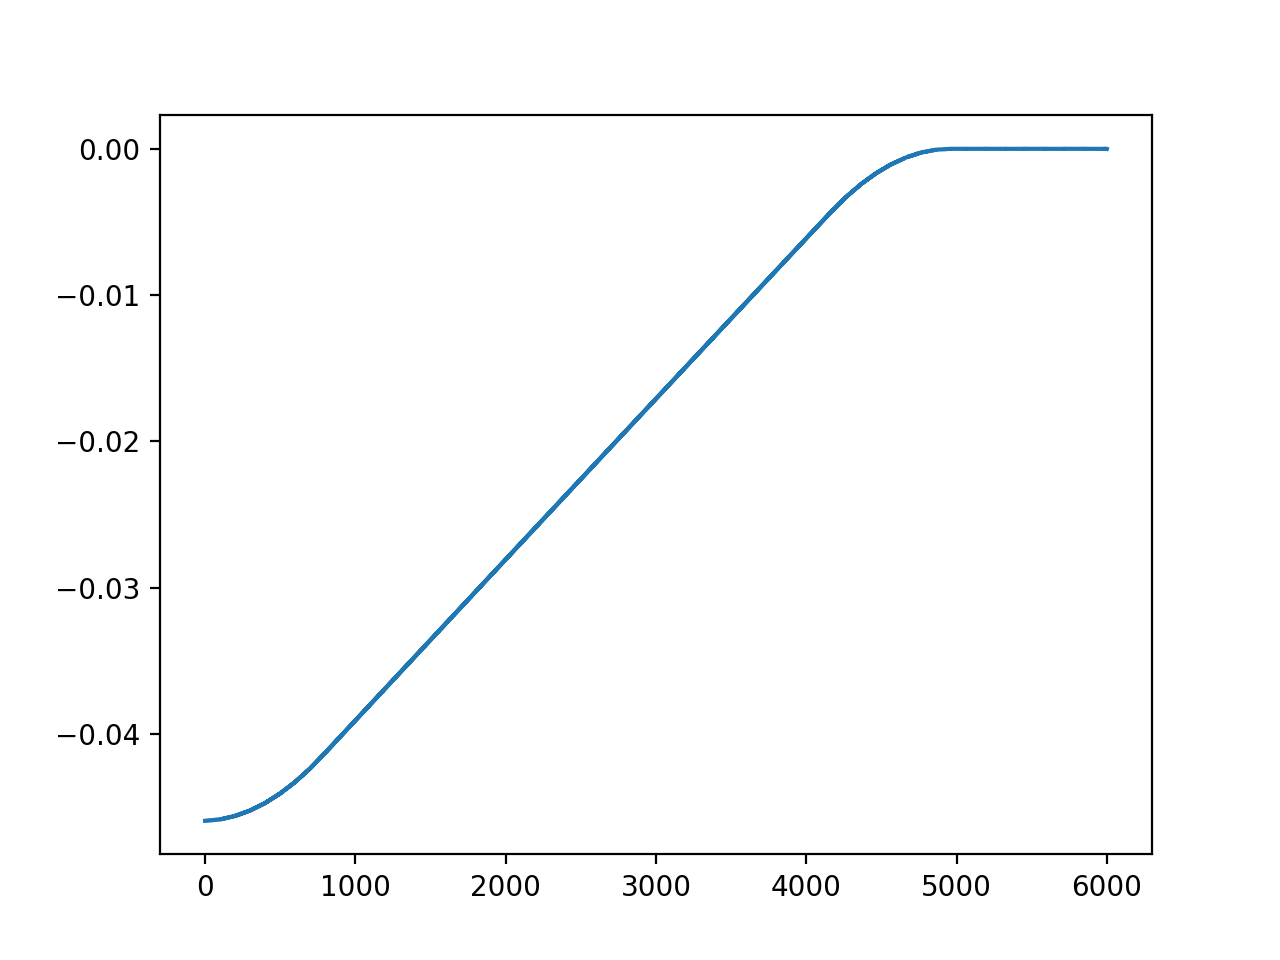

In [14]:
p = line.build_particles(x=0, px=0, y=0, py=0, delta=0, zeta=0)

line.enable_time_dependent_vars = True
line.dt_update_time_dependent_vars = 3e-6
line.vars.cache_active = True

print('Tracking...')
line.track(p, num_turns=6000, time=True)
print(f'Done in {line.time_last_track:.4} s')

assert np.isclose(monitor.x[0, 0], -0.045936, rtol=0, atol=1e-5)
assert np.isclose(monitor.x[0, 300], -0.04522354, rtol=0, atol=1e-5)
assert np.isclose(monitor.x[0, 2500], -0.02256763, rtol=0, atol=1e-5)
assert np.isclose(monitor.x[0, 4500], -0.00143883, rtol=0, atol=1e-5)
assert np.isclose(monitor.x[0, 5500], 0.0, rtol=0, atol=1e-5)


import matplotlib.pyplot as plt

plt.close('all')
plt.figure(1)
plt.plot(monitor.x.T)

plt.show()

-------

In [21]:
tt = line.get_table()

In [26]:
tt.rows[tt.element_type == 'Cavity']

Table: 6 rows, 4 cols
          name       s element_type isthick
 br1.acwf5l1.1 39.9928       Cavity   False
 br1.acwf5l1.2 41.0473       Cavity   False
 br1.acwf7l1.1 59.6278       Cavity   False
 br1.acwf7l1.2 60.6823       Cavity   False
br1.acwf13l1.1 118.533       Cavity   False
br1.acwf13l1.2 119.587       Cavity   False